In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('ice_cream_data.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [7]:
df.rename(columns = {'DATE':'Date', 'IPN31152N':'production'}, inplace = True)

# Convert date column to datetime
df.Date = pd.to_datetime(df.Date)

#set date as index
df.set_index('Date', inplace=True)

df.head()

,production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


Text(0, 0.5, 'Production')

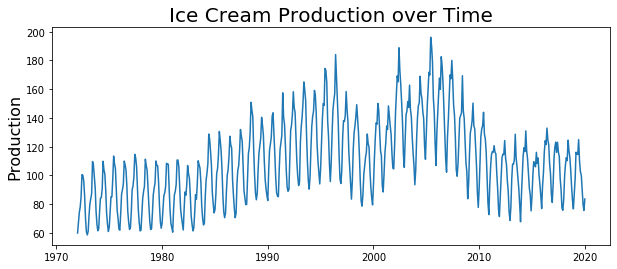

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

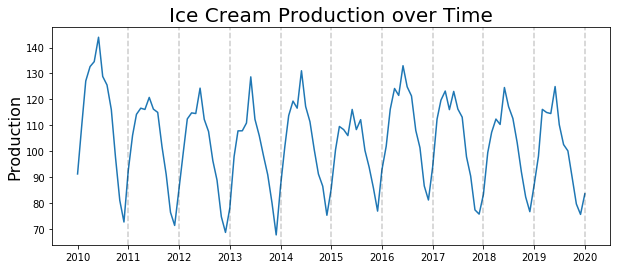

In [12]:
# Let us look at data after 2010
start_date = pd.to_datetime('2010-01-01')

df = df[start_date:]

plt.figure(figsize=(10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

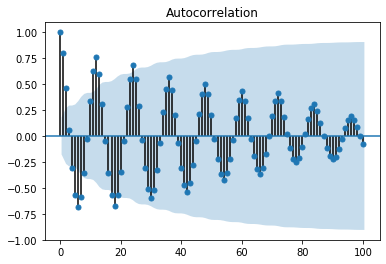

In [15]:
acf_plot = plot_acf(df.production, lags=100)

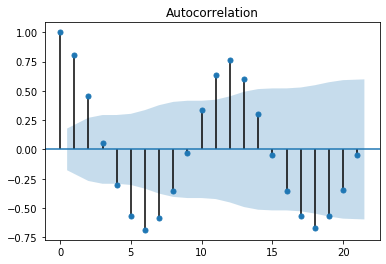

In [19]:
acf_plot = plot_acf(df.production)

#### ACF is decaying

## PACF

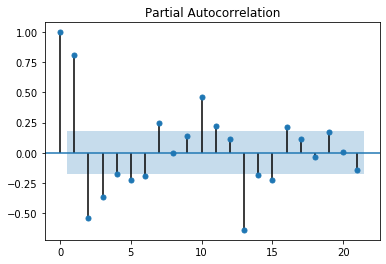

In [18]:
pacf_plot = plot_pacf(df.production)

Based on PACF we can start with AR model at lags 1,2,3,10, 13